<a href="https://colab.research.google.com/github/nickklos10/League-of-Legends-Match-Predictor/blob/main/LEoL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install scikit-learn
!pip install torch
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

In [3]:
data_path = '/content/league_of_legends_data_large.csv'
try:
    data = pd.read_csv(data_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{data_path}' was not found.")
    exit()

print("\nFirst 5 rows of the dataset:")
data.head()

Dataset loaded successfully.

First 5 rows of the dataset:


,win,kills,deaths,assists,gold_earned,cs,wards_placed,wards_killed,damage_dealt
0,0,16,6,19,17088,231,11,7,15367
1,1,8,8,5,14865,259,10,2,38332
2,0,0,17,11,15919,169,14,5,24642
3,0,19,11,1,11534,264,14,3,15789
4,0,12,7,6,18926,124,15,7,40268


In [4]:
X = data.drop('win', axis=1)
y = data['win']

print("\nFeatures and target separated.")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features and target separated.
Features shape: (1000, 8)
Target shape: (1000,)


In [5]:
test_size = 0.2
random_state = 42  # Ensures reproducibility

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state, stratify=y
)

print("\nData split into training and testing sets.")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


Data split into training and testing sets.
Training features shape: (800, 8)
Testing features shape: (200, 8)
Training target shape: (800,)
Testing target shape: (200,)


In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling completed.")
print(f"Mean of scaled training features: {X_train_scaled.mean(axis=0)}")
print(f"Standard deviation of scaled training features: {X_train_scaled.std(axis=0)}")


Feature scaling completed.
Mean of scaled training features: [-8.88178420e-17  7.99360578e-17  0.00000000e+00 -6.66133815e-17
 -1.99840144e-16  1.19904087e-16  6.21724894e-17 -1.17683641e-16]
Standard deviation of scaled training features: [1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

# Convert target to float32 tensors and reshape to (n_samples, 1)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

print("\nConversion to PyTorch tensors completed.")
print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"X_test_tensor shape: {X_test_tensor.shape}")
print(f"y_test_tensor shape: {y_test_tensor.shape}")


Conversion to PyTorch tensors completed.
X_train_tensor shape: torch.Size([800, 8])
y_train_tensor shape: torch.Size([800, 1])
X_test_tensor shape: torch.Size([200, 8])
y_test_tensor shape: torch.Size([200, 1])


In [8]:
print("\nSample data (first 5 training samples):")
for i in range(5):
    print(f"Feature tensor: {X_train_tensor[i]}")
    print(f"Target tensor: {y_train_tensor[i]}\n")

print("Data loading and preprocessing completed successfully.")


Sample data (first 5 training samples):
Feature tensor: tensor([ 1.1482, -0.2445, -1.4713,  0.4149,  1.5531,  1.2602, -0.1709, -0.6457])
Target tensor: tensor([1.])

Feature tensor: tensor([-0.4119,  0.1060,  0.4540,  1.0650,  0.9660,  0.3933, -0.5153,  1.2711])
Target tensor: tensor([0.])

Feature tensor: tensor([-1.6254,  1.5079, -0.7712,  0.4211,  0.7983,  1.4336,  0.1735,  1.4220])
Target tensor: tensor([1.])

Feature tensor: tensor([ 0.1081, -1.1207,  0.2789,  0.9272,  1.2876,  0.7401,  0.5178, -1.2290])
Target tensor: tensor([1.])

Feature tensor: tensor([ 0.1081,  0.8070,  1.6791, -0.6945,  1.3295,  0.5667, -0.1709,  0.5433])
Target tensor: tensor([1.])

Data loading and preprocessing completed successfully.


In [9]:
import torch.nn as nn
import torch.optim as optim

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out

In [10]:
input_dim = X_train_tensor.shape[1]
print(f"Number of input features: {input_dim}")

model = LogisticRegressionModel(input_dim)
print("\nLogistic Regression Model:")
print(model)

criterion = nn.BCELoss()

learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

print("\nModel, loss function, and optimizer initialized successfully.")

Number of input features: 8

Logistic Regression Model:
LogisticRegressionModel(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)

Model, loss function, and optimizer initialized successfully.


In [12]:
num_epochs = 1000

for epoch in range(1, num_epochs + 1):
    model.train()

    optimizer.zero_grad()

    outputs = model(X_train_tensor)

    loss = criterion(outputs, y_train_tensor)

    loss.backward()

    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 0.7140
Epoch [200/1000], Loss: 0.7055
Epoch [300/1000], Loss: 0.7000
Epoch [400/1000], Loss: 0.6965
Epoch [500/1000], Loss: 0.6942
Epoch [600/1000], Loss: 0.6928
Epoch [700/1000], Loss: 0.6919
Epoch [800/1000], Loss: 0.6913
Epoch [900/1000], Loss: 0.6909
Epoch [1000/1000], Loss: 0.6907


In [13]:
model.eval()

with torch.no_grad():

    train_outputs = model(X_train_tensor)
    train_predicted = (train_outputs >= 0.5).float()

    test_outputs = model(X_test_tensor)

    test_predicted = (test_outputs >= 0.5).float()

    # Calculate training accuracy
    train_correct = (train_predicted == y_train_tensor).sum().item()
    train_total = y_train_tensor.size(0)
    train_accuracy = train_correct / train_total * 100

    # Calculate testing accuracy
    test_correct = (test_predicted == y_test_tensor).sum().item()
    test_total = y_test_tensor.size(0)
    test_accuracy = test_correct / test_total * 100

print(f"\nTraining Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%")


Training Accuracy: 54.62%
Testing Accuracy: 53.50%


In [14]:
import pandas as pd
import numpy as np

input_dim = X_train_tensor.shape[1]
print(f"\nNumber of input features: {input_dim}")

model_optimized = LogisticRegressionModel(input_dim)
print("\nLogistic Regression Model with L2 Regularization:")
print(model_optimized)
criterion = nn.BCELoss()

learning_rate = 0.01
weight_decay = 0.01

optimizer_optimized = optim.SGD(model_optimized.parameters(), lr=learning_rate, weight_decay=weight_decay)

print("\nModel, loss function, and optimizer with L2 regularization initialized successfully.")


Number of input features: 8

Logistic Regression Model with L2 Regularization:
LogisticRegressionModel(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)

Model, loss function, and optimizer with L2 regularization initialized successfully.


In [15]:
# Training Model with L2 Regularization

num_epochs = 1000

for epoch in range(1, num_epochs + 1):
    model_optimized.train()

    optimizer_optimized.zero_grad()

    outputs = model_optimized(X_train_tensor)

    loss = criterion(outputs, y_train_tensor)

    loss.backward()

    optimizer_optimized.step()

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 0.7193
Epoch [200/1000], Loss: 0.7083
Epoch [300/1000], Loss: 0.7014
Epoch [400/1000], Loss: 0.6971
Epoch [500/1000], Loss: 0.6945
Epoch [600/1000], Loss: 0.6929
Epoch [700/1000], Loss: 0.6919
Epoch [800/1000], Loss: 0.6913
Epoch [900/1000], Loss: 0.6909
Epoch [1000/1000], Loss: 0.6907


In [16]:
# Model Evaluation

model_optimized.eval()

with torch.no_grad():
    train_outputs = model_optimized(X_train_tensor)

    train_predicted = (train_outputs >= 0.5).float()

    test_outputs = model_optimized(X_test_tensor)

    test_predicted = (test_outputs >= 0.5).float()

    train_correct = (train_predicted == y_train_tensor).sum().item()
    train_total = y_train_tensor.size(0)
    train_accuracy = train_correct / train_total * 100

    test_correct = (test_predicted == y_test_tensor).sum().item()
    test_total = y_test_tensor.size(0)
    test_accuracy = test_correct / test_total * 100

print(f"\nOptimized Model Training Accuracy: {train_accuracy:.2f}%")
print(f"Optimized Model Testing Accuracy: {test_accuracy:.2f}%")


Optimized Model Training Accuracy: 53.25%
Optimized Model Testing Accuracy: 57.00%


In [21]:
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
%matplotlib inline

In [22]:
model_optimized.eval()

with torch.no_grad():
    train_outputs = model_optimized(X_train_tensor)
    train_predicted = (train_outputs >= 0.5).float()
    train_probs = train_outputs.numpy()
    train_labels = y_train_tensor.numpy()

    test_outputs = model_optimized(X_test_tensor)
    test_predicted = (test_outputs >= 0.5).float()
    test_probs = test_outputs.numpy()
    test_labels = y_test_tensor.numpy()

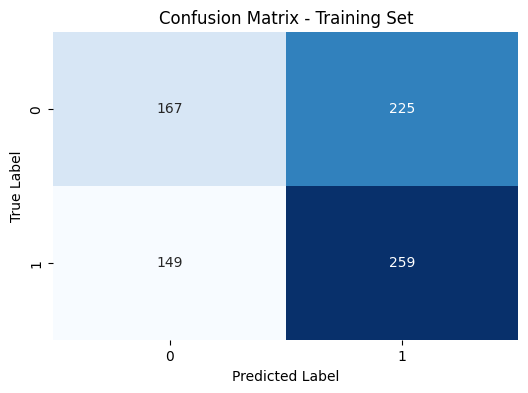

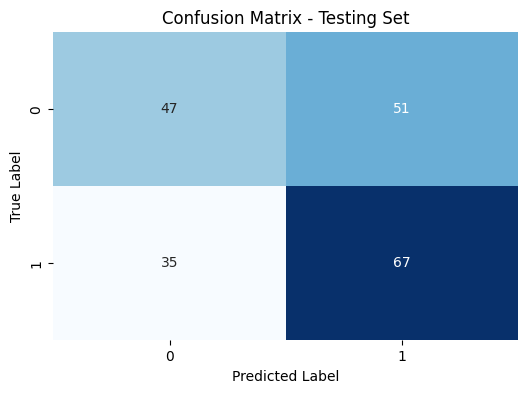

In [23]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Plot Confusion Matrix for Training Set
plot_confusion_matrix(train_labels, train_predicted.numpy(), 'Confusion Matrix - Training Set')

# Plot Confusion Matrix for Testing Set
plot_confusion_matrix(test_labels, test_predicted.numpy(), 'Confusion Matrix - Testing Set')

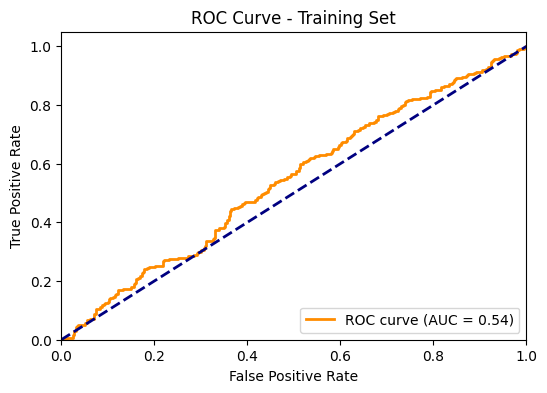

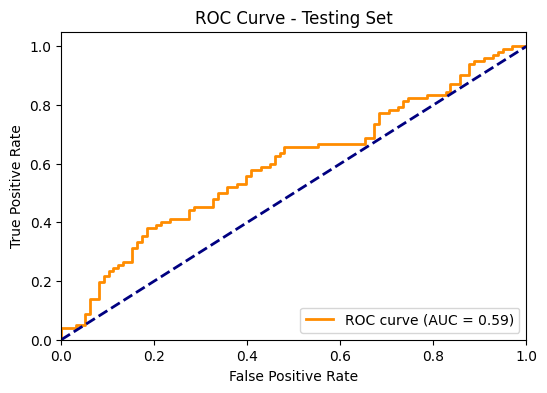

Classification Report - Training Set
              precision    recall  f1-score   support

         0.0       0.53      0.43      0.47       392
         1.0       0.54      0.63      0.58       408

    accuracy                           0.53       800
   macro avg       0.53      0.53      0.53       800
weighted avg       0.53      0.53      0.53       800

Classification Report - Testing Set
              precision    recall  f1-score   support

         0.0       0.57      0.48      0.52        98
         1.0       0.57      0.66      0.61       102

    accuracy                           0.57       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.57      0.57      0.57       200



In [24]:
# Function to plot ROC curve
def plot_roc_curve(y_true, y_probs, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(train_labels, train_probs, 'ROC Curve - Training Set')

plot_roc_curve(test_labels, test_probs, 'ROC Curve - Testing Set')

print("Classification Report - Training Set")
print(classification_report(train_labels, train_predicted.numpy()))

print("Classification Report - Testing Set")
print(classification_report(test_labels, test_predicted.numpy()))

In [25]:
model_save_path = 'logistic_regression_model.pth'
torch.save(model_optimized.state_dict(), model_save_path)
print(f"Model saved successfully at '{model_save_path}'.")

Model saved successfully at 'logistic_regression_model.pth'.


In [26]:
model_loaded = LogisticRegressionModel(input_dim)
model_loaded.load_state_dict(torch.load(model_save_path))

model_loaded.eval()
print("Model loaded successfully and set to evaluation mode.")

Model loaded successfully and set to evaluation mode.


<ipython-input-26-c8013f0e0c2a>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_loaded.load_state_dict(torch.load(model_save_path))


In [27]:
with torch.no_grad():
    test_outputs_loaded = model_loaded(X_test_tensor)
    test_predicted_loaded = (test_outputs_loaded >= 0.5).float()
    test_correct_loaded = (test_predicted_loaded == y_test_tensor).sum().item()

    test_total = y_test_tensor.size(0)

    test_accuracy_loaded = (test_correct_loaded / test_total) * 100

print(f"Loaded Model Testing Accuracy: {test_accuracy_loaded:.2f}%")

Loaded Model Testing Accuracy: 57.00%


In [28]:
def train_and_evaluate(lr, input_dim, X_train, y_train, X_test, y_test, epochs=100, weight_decay=0.01):
    # Initialize the model
    model = LogisticRegressionModel(input_dim)

    criterion = nn.BCELoss()

    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Training loop
    for epoch in range(1, epochs + 1):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        if epoch % 20 == 0:
            print(f"Learning Rate: {lr}, Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

    model.eval()
    with torch.no_grad():

        test_outputs = model(X_test)
        test_predicted = (test_outputs >= 0.5).float()

        test_correct = (test_predicted == y_test).sum().item()
        test_total = y_test.size(0)
        test_accuracy = (test_correct / test_total) * 100

    return test_accuracy


Training with Learning Rate: 0.01
Learning Rate: 0.01, Epoch [20/100], Loss: 0.7625
Learning Rate: 0.01, Epoch [40/100], Loss: 0.7557
Learning Rate: 0.01, Epoch [60/100], Loss: 0.7495
Learning Rate: 0.01, Epoch [80/100], Loss: 0.7439
Learning Rate: 0.01, Epoch [100/100], Loss: 0.7387
Test Accuracy with Learning Rate 0.01: 51.00%

Training with Learning Rate: 0.05
Learning Rate: 0.05, Epoch [20/100], Loss: 0.6983
Learning Rate: 0.05, Epoch [40/100], Loss: 0.6952
Learning Rate: 0.05, Epoch [60/100], Loss: 0.6933
Learning Rate: 0.05, Epoch [80/100], Loss: 0.6922
Learning Rate: 0.05, Epoch [100/100], Loss: 0.6915
Test Accuracy with Learning Rate 0.05: 52.50%

Training with Learning Rate: 0.1
Learning Rate: 0.1, Epoch [20/100], Loss: 0.7057
Learning Rate: 0.1, Epoch [40/100], Loss: 0.6961
Learning Rate: 0.1, Epoch [60/100], Loss: 0.6925
Learning Rate: 0.1, Epoch [80/100], Loss: 0.6911
Learning Rate: 0.1, Epoch [100/100], Loss: 0.6906
Test Accuracy with Learning Rate 0.1: 54.00%

Best Learn

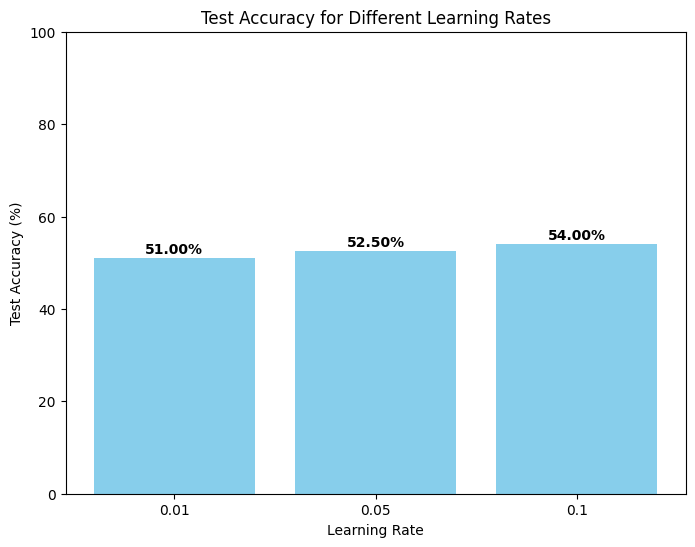

In [29]:
learning_rates = [0.01, 0.05, 0.1]

input_dim = X_train_tensor.shape[1]

test_accuracies = {}

# Perform hyperparameter tuning
for lr in learning_rates:
    print(f"\nTraining with Learning Rate: {lr}")
    accuracy = train_and_evaluate(
        lr=lr,
        input_dim=input_dim,
        X_train=X_train_tensor,
        y_train=y_train_tensor,
        X_test=X_test_tensor,
        y_test=y_test_tensor,
        epochs=100,
        weight_decay=0.01
    )
    test_accuracies[lr] = accuracy
    print(f"Test Accuracy with Learning Rate {lr}: {accuracy:.2f}%")

best_lr = max(test_accuracies, key=test_accuracies.get)
best_accuracy = test_accuracies[best_lr]

print(f"\nBest Learning Rate: {best_lr} with Test Accuracy: {best_accuracy:.2f}%")

plt.figure(figsize=(8,6))
lrs = list(test_accuracies.keys())
accuracies = list(test_accuracies.values())
plt.bar([str(lr) for lr in lrs], accuracies, color='skyblue')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy for Different Learning Rates')
plt.ylim(0, 100)
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')
plt.show()

In [30]:
feature_names = ['kills', 'deaths', 'assists', 'gold_earned', 'cs', 'wards_placed', 'wards_killed', 'damage_dealt']

weights = model_optimized.linear.weight.data.numpy().flatten()

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Weight': weights,
    'Absolute Weight': np.abs(weights)
})

<ipython-input-31-fcd4aa9826f9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight', y='Feature', data=feature_importance_sorted, palette='viridis')


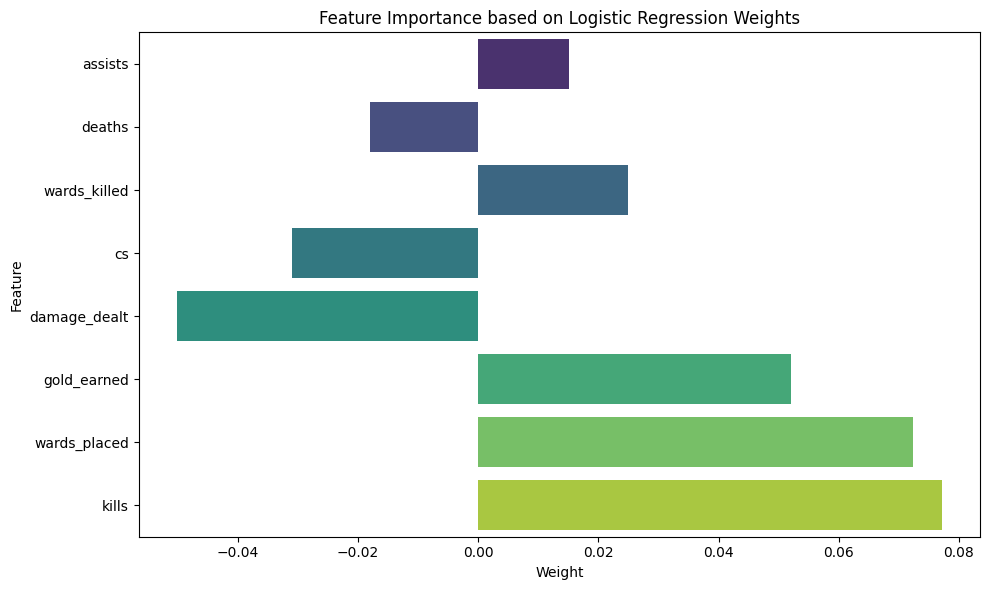

Feature Importance:
        Feature    Weight
2       assists  0.015177
1        deaths -0.018045
6  wards_killed  0.024891
4            cs -0.031002
7  damage_dealt -0.050144
3   gold_earned  0.051992
5  wards_placed  0.072442
0         kills  0.077157


In [31]:
feature_importance_sorted = feature_importance.sort_values(by='Absolute Weight', ascending=True)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Weight', y='Feature', data=feature_importance_sorted, palette='viridis')
plt.title('Feature Importance based on Logistic Regression Weights')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Feature Importance:")
print(feature_importance_sorted[['Feature', 'Weight']])